In [49]:
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json
import pandas as pd

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'15',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': '33aea596-c86f-4520-81b1-abb02be3e8a3',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  #print(response.text)
  data = json.loads(response.text)
  #print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)


# (ssl.c:1129) may occur
#  reason might be clash for windows doesn't support https proxy,
# while urllib3 version 1.26.7 will directly deliver https proxy to clash
# the previous version will change https to http (doesn't support https)
# solution: reinstall the urllib version=<1.25
# pip install urllib3==1.25.7 (turn out can't find hostname because of proxyhost is open, need to turn of proxyhost in internet setting)
# turn proxyhost back on for connect api server
# (ssl.c:1229) solved

# exceed data limit may occur
# Put "jupyter notebook --NotebookApp.iopub_data_rate_limit=1000000000"
# Into the Anaconda Prompt to change this to allow to pull data(too much data for orginal setting)
#Anaconde Prompt will return a new jupyter local host url with token, configure Pycharm to use new jupter host sevrer
# problem solved

In [2]:
import pandas as pd

In [51]:
df = pd.json_normalize(data['data'])

# data is a dictionary with two keys 'status' and 'data', only need 'data'

##Add timestamp

In [52]:
df['timtstamp'] = pd.to_datetime('now')

In [53]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,...,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timtstamp
0,1,Bitcoin,BTC,bitcoin,9526,2013-04-28T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.906183e+07,1.906183e+07,...,5.812618e+11,46.4487,6.403634e+11,2022-06-08T15:45:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-06-08 15:46:15.689446
1,1027,Ethereum,ETH,ethereum,5744,2015-08-07T00:00:00.000Z,"[mineable, pow, smart-contracts, ethereum-ecos...",NaN,1.210961e+08,1.210961e+08,...,2.199061e+11,17.5727,2.199061e+11,2022-06-08T15:44:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-06-08 15:46:15.689446
2,825,Tether,USDT,tether,34448,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,7.242055e+10,7.971362e+10,...,7.238058e+10,5.7830,7.966963e+10,2022-06-08T15:44:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2022-06-08 15:46:15.689446
3,3408,USD Coin,USDC,usd-coin,4320,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,5.381231e+10,5.381231e+10,...,5.382091e+10,4.3001,5.382091e+10,2022-06-08T15:44:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2022-06-08 15:46:15.689446
4,1839,BNB,BNB,bnb,943,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",1.651168e+08,1.632770e+08,1.632770e+08,...,4.779417e+10,3.8182,4.833271e+10,2022-06-08T15:44:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-06-08 15:46:15.689446
5,2010,Cardano,ADA,cardano,454,2017-10-01T00:00:00.000Z,"[mineable, dpos, pos, platform, research, smar...",4.500000e+10,3.373903e+10,3.451285e+10,...,2.237026e+10,1.7873,2.983672e+10,2022-06-08T15:44:00.000Z,1839.0,BNB,BNB,bnb,0x3ee2200efb3400fabb9aacf31297cbdd1d435d47,2022-06-08 15:46:15.689446
6,52,XRP,XRP,xrp,736,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, bin...",1.000000e+11,4.834310e+10,9.998954e+10,...,1.948019e+10,1.5567,4.029570e+10,2022-06-08T15:44:00.000Z,1839.0,BNB,BNB,bnb,0x1d2f0da169ceb9fc7b3144628db156f3f6c60dbe,2022-06-08 15:46:15.689446
7,4687,Binance USD,BUSD,binance-usd,3817,2019-09-20T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, binance-...",NaN,1.801328e+10,1.801328e+10,...,1.802447e+10,1.4401,1.802447e+10,2022-06-08T15:44:00.000Z,1839.0,BNB,BNB,bnb,BUSD-BD1,2022-06-08 15:46:15.689446
8,5426,Solana,SOL,solana,327,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,3.417511e+08,5.116169e+08,...,1.362691e+10,1.0886,2.040011e+10,2022-06-08T15:44:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-06-08 15:46:15.689446
9,74,Dogecoin,DOGE,dogecoin,483,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,1.326708e+11,1.326708e+11,...,1.065320e+10,0.8511,1.065320e+10,2022-06-08T15:44:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-06-08 15:46:15.689446


In [54]:
def api_runner():
  global df
  url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
  parameters = {
    'start':'1',
    'limit':'15',
    'convert':'USD'
  }
  headers = {
    'Accepts': 'application/json',
    'X-CMC_PRO_API_KEY': '33aea596-c86f-4520-81b1-abb02be3e8a3',
  }

  session = Session()
  session.headers.update(headers)

  try:
    response = session.get(url, params=parameters)
    data = json.loads(response.text)
  #  print(data)
  except (ConnectionError, Timeout, TooManyRedirects) as e:
    print(e)

  df2 = pd.json_normalize(data['data'])
  df2['timestamp'] = pd.to_datetime('now')
  df = df.append(df2)

In [55]:
import os
from time import time
from time import sleep

for i in range(333):
    api_runner()
    print('API Runner completed')
    sleep(60) #sleep for 1 minute
exit()

API Runner completed
API Runner completed
API Runner completed


KeyboardInterrupt: 

In [56]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,...,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timtstamp,timestamp
0,1,Bitcoin,BTC,bitcoin,9526,2013-04-28T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.906183e+07,1.906183e+07,...,46.4487,6.403634e+11,2022-06-08T15:45:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-06-08 15:46:15.689446,NaT
1,1027,Ethereum,ETH,ethereum,5744,2015-08-07T00:00:00.000Z,"[mineable, pow, smart-contracts, ethereum-ecos...",NaN,1.210961e+08,1.210961e+08,...,17.5727,2.199061e+11,2022-06-08T15:44:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-06-08 15:46:15.689446,NaT
2,825,Tether,USDT,tether,34448,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,7.242055e+10,7.971362e+10,...,5.7830,7.966963e+10,2022-06-08T15:44:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2022-06-08 15:46:15.689446,NaT
3,3408,USD Coin,USDC,usd-coin,4320,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,5.381231e+10,5.381231e+10,...,4.3001,5.382091e+10,2022-06-08T15:44:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2022-06-08 15:46:15.689446,NaT
4,1839,BNB,BNB,bnb,943,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",1.651168e+08,1.632770e+08,1.632770e+08,...,3.8182,4.833271e+10,2022-06-08T15:44:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-06-08 15:46:15.689446,NaT
5,2010,Cardano,ADA,cardano,454,2017-10-01T00:00:00.000Z,"[mineable, dpos, pos, platform, research, smar...",4.500000e+10,3.373903e+10,3.451285e+10,...,1.7873,2.983672e+10,2022-06-08T15:44:00.000Z,1839.0,BNB,BNB,bnb,0x3ee2200efb3400fabb9aacf31297cbdd1d435d47,2022-06-08 15:46:15.689446,NaT
6,52,XRP,XRP,xrp,736,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, bin...",1.000000e+11,4.834310e+10,9.998954e+10,...,1.5567,4.029570e+10,2022-06-08T15:44:00.000Z,1839.0,BNB,BNB,bnb,0x1d2f0da169ceb9fc7b3144628db156f3f6c60dbe,2022-06-08 15:46:15.689446,NaT
7,4687,Binance USD,BUSD,binance-usd,3817,2019-09-20T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, binance-...",NaN,1.801328e+10,1.801328e+10,...,1.4401,1.802447e+10,2022-06-08T15:44:00.000Z,1839.0,BNB,BNB,bnb,BUSD-BD1,2022-06-08 15:46:15.689446,NaT
8,5426,Solana,SOL,solana,327,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,3.417511e+08,5.116169e+08,...,1.0886,2.040011e+10,2022-06-08T15:44:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-06-08 15:46:15.689446,NaT
9,74,Dogecoin,DOGE,dogecoin,483,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,1.326708e+11,1.326708e+11,...,0.8511,1.065320e+10,2022-06-08T15:44:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-06-08 15:46:15.689446,NaT


In [57]:
# Now let's look at the coin trends over time

df3 = df.groupby('name', sort=False)[['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d']].mean()
df3

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,0.060866,2.077694,-1.169541,-5.839647,-28.089743,-22.322186
Ethereum,0.459463,2.014182,-3.972286,-23.659843,-43.612423,-30.102656
Tether,0.008892,0.023389,0.021391,-0.061020,-0.094364,-0.104533
USD Coin,0.006646,0.011462,0.019577,0.026197,0.040642,0.069170
BNB,0.288144,3.877582,-4.766839,-9.884183,-30.860041,-20.181185
Cardano,0.652376,7.368791,14.390508,0.368373,-35.627558,-17.647782
XRP,0.454588,2.230352,-1.614569,-23.441696,-46.902162,-44.943706
Binance USD,-0.017253,-0.101141,0.024734,0.059308,0.032417,0.056730
Solana,0.574736,2.025101,-7.803697,-43.126470,-63.787973,-51.526001


In [58]:
df4 = df3.stack()
df4

name                                   
Bitcoin    quote.USD.percent_change_1h      0.060866
           quote.USD.percent_change_24h     2.077694
           quote.USD.percent_change_7d     -1.169541
           quote.USD.percent_change_30d    -5.839647
           quote.USD.percent_change_60d   -28.089743
                                             ...    
Avalanche  quote.USD.percent_change_24h     1.156280
           quote.USD.percent_change_7d     -1.537192
           quote.USD.percent_change_30d   -48.019639
           quote.USD.percent_change_60d   -70.269982
           quote.USD.percent_change_90d   -66.246310
Length: 90, dtype: float64

In [60]:
df5 = df4.to_frame(name='values')
df5

values
name                                             
Bitcoin   quote.USD.percent_change_1h    0.060866
          quote.USD.percent_change_24h   2.077694
          quote.USD.percent_change_7d   -1.169541
          quote.USD.percent_change_30d  -5.839647
          quote.USD.percent_change_60d -28.089743
...                                           ...
Avalanche quote.USD.percent_change_24h   1.156280
          quote.USD.percent_change_7d   -1.537192
          quote.USD.percent_change_30d -48.019639
          quote.USD.percent_change_60d -70.269982
          quote.USD.percent_change_90d -66.246310

[90 rows x 1 columns]

In [61]:
df5.count()

values    90
dtype: int64

In [22]:
index = pd.Index(range(90))
index

RangeIndex(start=0, stop=90, step=1)

In [62]:
df6 = df5.reset_index()
df6

,name,level_1,values
0,Bitcoin,quote.USD.percent_change_1h,0.060866
1,Bitcoin,quote.USD.percent_change_24h,2.077694
2,Bitcoin,quote.USD.percent_change_7d,-1.169541
3,Bitcoin,quote.USD.percent_change_30d,-5.839647
4,Bitcoin,quote.USD.percent_change_60d,-28.089743
...,...,...,...
85,Avalanche,quote.USD.percent_change_24h,1.156280
86,Avalanche,quote.USD.percent_change_7d,-1.537192
87,Avalanche,quote.USD.percent_change_30d,-48.019639
88,Avalanche,quote.USD.percent_change_60d,-70.269982


In [63]:
df7 = df6.rename(columns={'level_1': 'percent_change'})
df7

,name,percent_change,values
0,Bitcoin,quote.USD.percent_change_1h,0.060866
1,Bitcoin,quote.USD.percent_change_24h,2.077694
2,Bitcoin,quote.USD.percent_change_7d,-1.169541
3,Bitcoin,quote.USD.percent_change_30d,-5.839647
4,Bitcoin,quote.USD.percent_change_60d,-28.089743
...,...,...,...
85,Avalanche,quote.USD.percent_change_24h,1.156280
86,Avalanche,quote.USD.percent_change_7d,-1.537192
87,Avalanche,quote.USD.percent_change_30d,-48.019639
88,Avalanche,quote.USD.percent_change_60d,-70.269982


In [64]:
df7['percent_change'] = df7['percent_change'].replace(['quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d'],['24h','7d','30d','60d','90d'])
df7

,name,percent_change,values
0,Bitcoin,quote.USD.percent_change_1h,0.060866
1,Bitcoin,24h,2.077694
2,Bitcoin,7d,-1.169541
3,Bitcoin,30d,-5.839647
4,Bitcoin,60d,-28.089743
...,...,...,...
85,Avalanche,24h,1.156280
86,Avalanche,7d,-1.537192
87,Avalanche,30d,-48.019639
88,Avalanche,60d,-70.269982


In [65]:
import seaborn as sns
import matplotlib.pyplot as plt

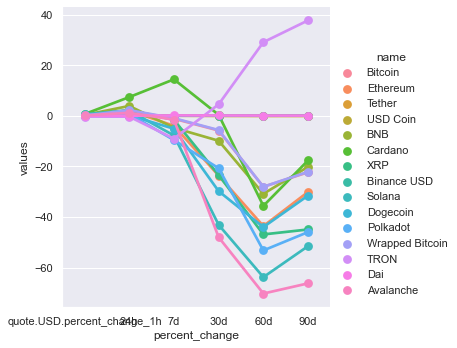

In [66]:
sns.catplot(x='percent_change', y='values', hue='name', data=df7, kind='point')

In [69]:
df10 = df[['name','quote.USD.price','timestamp']]
df10 = df10.query("name == 'Bitcoin'")
df10

,name,quote.USD.price,timestamp
0,Bitcoin,30493.493442,NaT
0,Bitcoin,30445.564118,2022-06-08 15:46:31.398163
0,Bitcoin,30446.842759,2022-06-08 15:47:31.879270
0,Bitcoin,30444.001937,2022-06-08 15:48:32.565093


ValueError: cannot reindex from a duplicate axis

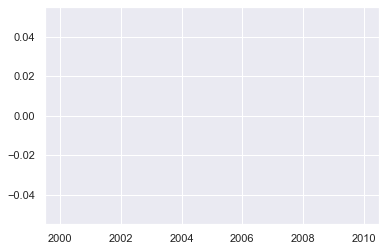

In [70]:
sns.set_theme(style="darkgrid")

sns.lineplot(x='timestamp', y='quote.USD.price', data = df10)